<div align="center">
  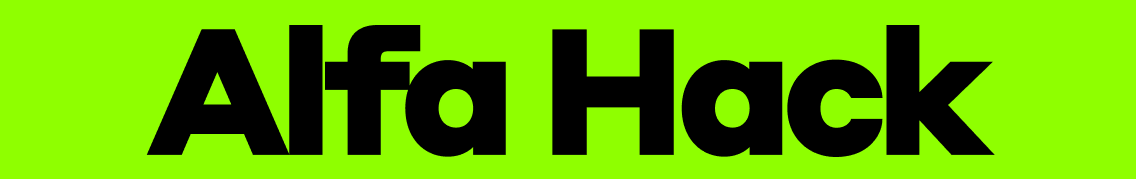
</div>

## Этап 1. Установка библиотек и импорт данных

In [1]:
# Cкачиваем необходимые библиотеки для работы
!pip install pandas numpy scikit-learn

In [2]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score
import pandas as pd
import numpy as np
import glob
import os

Подключаемся в Google Drive, чтобы работать с файлами из Google Colaboratory


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Указываем путь к корневым папкам с данными test и train

__Обратите внимание:__ если вы создали папку с названием отличным от _"Хакатон Альфа-банка. Кейс 3"_, то необходимо поменять путь к директории и ссылки ниже

In [4]:
# Путь к папке с тренировочными данными
path_train = '/content/drive/MyDrive/AlfaHack/Case3/train'
# Путь к папке с тестовыми данными
path_test = '/content/drive/MyDrive/AlfaHack/Case3/test/'

Получим список файлов в каждой из папок с данными

In [5]:
print(*[f'Список файлов в репозитории {x.split("/")[-1]}: {sorted(os.listdir(x))}' for x in [path_train, path_test]], sep='\n')

Список файлов в репозитории train: ['train_1.csv', 'train_10.csv', 'train_2.csv', 'train_3.csv', 'train_4.csv', 'train_5.csv', 'train_6.csv', 'train_7.csv', 'train_8.csv', 'train_9.csv']
Список файлов в репозитории : ['test_1.csv', 'test_10.csv', 'test_2.csv', 'test_3.csv', 'test_4.csv', 'test_5.csv', 'test_6.csv', 'test_7.csv', 'test_8.csv', 'test_9.csv']


Объединим тренировочные и тестовые данные в единые датасеты train и test

In [6]:
# Получим список путей к файлам в папке train
filenames_train = glob.glob(path_train + "/*.csv")

# Создадим список для записи считанных файлов train
data_files_train = []

# Считаем все файлы train и добавим их в список
for filename in filenames_train:
    data_files_train.append(pd.read_csv(filename))

# Объединим тренировочные данные в единый датасет
data_train = pd.concat(data_files_train, ignore_index=True)

# Выведем информацию о размерности полученных тренировочных данных
display('Размерность полных тренировочных данных составляет: {} строки и {} столбцов'.format(*data_train.shape))

# Выведем первые 5 строк тренировочных данных
display(data_train.head())

# Удостоверимся, что перед нами данные только из выборки train
data_train['smpl'].value_counts(dropna=False)

'Размерность полных тренировочных данных составляет: 413194 строки и 189 столбцов'

,target,smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186
0,0,train,123957,-0.599917,-0.979222,-0.970136,0.172732,1.399724,2.227053,2.0,...,2.275866,-1.821970,9.0,-1.232141,2.244367,-0.199707,1.454468,1.522790,3.0,2.344804
1,0,train,123958,0.404078,-0.228780,0.164160,0.855858,-0.051261,0.324444,2.0,...,0.241131,0.558448,9.0,-0.934535,1.178442,0.389077,-0.361016,0.345436,2.0,-0.166686
2,1,train,123959,2.318336,-1.146061,0.251657,0.080618,-0.042581,-0.829405,2.0,...,-1.227211,2.660182,9.0,2.257485,0.922272,-1.469199,-1.028045,0.907549,2.0,-0.557001
3,0,train,123960,-2.423907,-0.501866,-0.499705,-0.701717,0.063560,-1.439272,2.0,...,-0.660922,0.263110,9.0,-0.176465,-0.570582,-2.261909,-0.785268,0.430430,2.0,-0.278513
4,0,train,123961,-0.269916,-0.116197,0.699998,-1.295687,-0.562152,0.832434,2.0,...,-0.413233,0.968060,9.0,0.749256,0.458435,-0.163953,0.856150,2.474183,2.0,0.426500


,count
smpl,
train,413194


In [13]:
# Выборка несбалансирована
print(data_train['target'].value_counts())
print(data_train['target'].value_counts(normalize=True))

target
0    388808
1     24386
Name: count, dtype: int64
target
0    0.940982
1    0.059018
Name: proportion, dtype: float64


Preprocessing a bit

In [8]:
# Получим список путей к файлам в папке test
filenames_test = glob.glob(path_test + "/*.csv")

# Создадим список для записи считанных файлов test
data_files_test = []

# Считаем все файлы test и добавим их в список
for filename in filenames_test:
    data_files_test.append(pd.read_csv(filename))

# Объединим тестовые данные в единый датасет
data_test = pd.concat(data_files_test, ignore_index=True)

# Выведем информацию о размерности полученных тестовых данных
display('Размерность полных тренировочных данных составляет: {} строк и {} столбцов'.format(*data_test.shape))

# Выведем первые 5 строк тренировочных данных
display(data_test.head())

# Удостоверимся, что перед нами данные только из выборки test
data_test['smpl'].value_counts(dropna=False)

'Размерность полных тренировочных данных составляет: 171919 строк и 188 столбцов'

,smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186
0,test,567913,-0.632510,2.216436,-0.786149,0.810722,-0.203018,-1.840743,2.0,-0.790528,...,-1.133593,-0.262365,1.0,0.810389,-2.151417,0.126665,-0.184624,-0.548969,2.0,-0.944812
1,test,567914,0.217286,-0.725873,1.592372,0.168818,1.378283,0.813106,4.0,0.178580,...,0.699853,0.531329,9.0,-0.822608,-0.552351,-1.194949,-0.146585,-0.050431,3.0,-0.779337
2,test,567915,-1.163354,0.611863,-0.577443,0.730878,1.270487,-0.329839,31.0,-1.256659,...,-0.911059,0.020814,9.0,-1.460169,-0.455826,-0.899361,1.072932,-0.750027,48.0,0.478126
3,test,567916,-1.353705,2.168088,-0.700905,0.022971,-0.071470,0.155877,2.0,-0.781091,...,-1.566054,-1.144402,9.0,1.529642,-0.129564,-0.940819,0.088195,-0.454992,2.0,-0.409471
4,test,567917,0.409604,1.245029,-0.577569,-1.445818,-0.785939,-0.125544,2.0,-0.532462,...,-1.567351,-0.636414,9.0,-0.497408,1.202895,0.519221,-0.190352,1.122778,2.0,-0.383463


,count
smpl,
test,171919


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413194 entries, 0 to 413193
Columns: 189 entries, target to feature_186
dtypes: float64(186), int64(2), object(1)
memory usage: 595.8+ MB


In [ ]:
pd.set_option('display.max_columns', None)
data_train.describe()

,target,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186
count,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.000000,413194.0000

## Этап 2. Работа с моделью

• ID — уникальный анонимный идентификатор клиента;\
• smpl — признак, указывающий на то, к какой выборке относятся данные
(train либо test);\
• target — целевое значение, которое вы должны спрогнозировать;\
• 186 признаков для обучения модели в формате feature_i, где i — номер конкретного признака по порядку.

**HistGBClf**

Использует гистограммы для ускорения процесса обучения, приближая данные и снижая вычислительные затраты.
Делает предварительное разбиение признаков на фиксированное количество бинов (например, 256), что улучшает производительность.
Предоставляет поддержку для дискретных и непрерывных переменных, делая работу с большими данными более эффективной.

In [14]:
# Выделим признаки для обучения и искомый признак в датасете train
# для обучения модели
X = data_train.drop(['target', 'smpl', 'id'], axis=1)
y = data_train['target']

# Разобьем тренировочные данные на валидационный и тренировочный датасет в соотношении 7 к 3
# Cтратифицируем выборки по искомому признаку, зафиксируем random_state для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.3)

# Обучим модель на тренировочной части тренировочных данных
gbdt_clf = HistGradientBoostingClassifier(min_samples_leaf=1,
                                          max_depth=10,
                                          max_iter=500,
                                          learning_rate = 0.05,
                                          random_state=42).fit(X_train, y_train)

# Получим предсказание с вероятностями для валидационной части тренировочного датасета
y_pred_proba = gbdt_clf.predict_proba(X_test)
y_pred = gbdt_clf.predict(X_test)

# Переведем предсказание в формат Series
y_pred_proba = pd.Series(y_pred_proba[:, 1])

# Высчитаем метрику roc-auc по валидационным данным
print(f'Метрика roc-auc на валидационных данных имеет значение: {roc_auc_score(y_test, y_pred_proba)}')


Метрика roc-auc на валидационных данных имеет значение: 0.8047055881636701


## **XGBoost**

In [ ]:
import xgboost as xgb

X = data_train.drop(['target', 'smpl', 'id'], axis=1)
y = data_train['target']

# Разобьем тренировочные данные на валидационный и тренировочный датасет в соотношении 7 к 3
# Cтратифицируем выборки по искомому признаку, зафиксируем random_state для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.3)

param = {'max_depth': 6,
         'learning_rate': 0.05,
         'nthread': 4,
         'objective': 'binary:logistic',
         'eval_metric': 'auc'}

xgb.train(param, xgb.DMatrix(X_train, y_train), num_boost_round=500, evals=[(xgb.DMatrix(X_test, y_test), 'test')],
          verbose_eval=50)


[0]	test-auc:0.78818
[50]	test-auc:0.80427
[100]	test-auc:0.80807
[150]	test-auc:0.80920
[200]	test-auc:0.80946
[250]	test-auc:0.80928
[300]	test-auc:0.80913
[350]	test-auc:0.80906
[400]	test-auc:0.80887
[450]	test-auc:0.80869
[499]	test-auc:0.80816


## LightGBM

In [ ]:
import lightgbm as lgb

X = data_train.drop(['target', 'smpl', 'id'], axis=1)
y = data_train['target']

# Разбиваем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.3)

params = {'objective': 'binary',
          'metric': 'auc',
          'num_leaves': 31,
          'learning_rate': 0.01,
          'subsample': 0.7,
          'subsample_freq': 1,
          'colsample_bytree': 0.7,
          'verbosity': -1}

tmp = lgb.train(params, train_set=lgb.Dataset(X_train, y_train),
                valid_sets=[lgb.Dataset(X_test, y_test), lgb.Dataset(X_train, y_train)],
                            num_boost_round=1000, callbacks=[lgb.log_evaluation(period=50)]  # Выводять информацию каждые 50 итераций)
)

[50]	valid_0's auc: 0.798688	valid_1's auc: 0.806773
[100]	valid_0's auc: 0.80106	valid_1's auc: 0.811649
[150]	valid_0's auc: 0.802594	valid_1's auc: 0.816287
[200]	valid_0's auc: 0.803865	valid_1's auc: 0.820742
[250]	valid_0's auc: 0.804817	valid_1's auc: 0.82554
[300]	valid_0's auc: 0.805506	valid_1's auc: 0.830194
[350]	valid_0's auc: 0.806226	valid_1's auc: 0.8348
[400]	valid_0's auc: 0.806683	valid_1's auc: 0.83923
[450]	valid_0's auc: 0.807041	valid_1's auc: 0.84366
[500]	valid_0's auc: 0.807349	valid_1's auc: 0.847713
[550]	valid_0's auc: 0.807612	valid_1's auc: 0.851714
[600]	valid_0's auc: 0.807825	valid_1's auc: 0.85586
[650]	valid_0's auc: 0.80792	valid_1's auc: 0.859534
[700]	valid_0's auc: 0.808024	valid_1's auc: 0.863055
[750]	valid_0's auc: 0.808051	valid_1's auc: 0.866595
[800]	valid_0's auc: 0.80817	valid_1's auc: 0.869941
[850]	valid_0's auc: 0.808243	valid_1's auc: 0.873176
[900]	valid_0's auc: 0.808336	valid_1's auc: 0.8762
[950]	valid_0's auc: 0.808417	valid_1's 

**Выбор лучшего порога**

In [ ]:
# 1. Выделим признаки для обучения и искомый признак в датасете train
X = data_train.drop(['target', 'smpl'], axis=1)
y = data_train['target']

# 2. Разобьем тренировочные данные на валидационный и тренировочный датасет
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.3)

# 3. Обучим модель на тренировочной части тренировочных данных
gbdt_clf = HistGradientBoostingClassifier(min_samples_leaf=1,
                                          max_depth=10,
                                          max_iter=125,
                                          random_state=42).fit(X_train, y_train)

# 4. Получим предсказание с вероятностями для валидационной части
y_pred_proba = gbdt_clf.predict_proba(X_test)[:, 1]

# 5. Определим диапазон порогов
thresholds = np.linspace(0, 1, 1000)
scores = []

# 6. Рассчитаем предсказания и метрики для каждого порога
for threshold in thresholds:
    y_pred_thresholded = (y_pred_proba >= threshold).astype(int)  # бинаризация предсказаний
    score = roc_auc_score(y_test, y_pred_thresholded)  # или любая другая метрика
    scores.append(score)

# 7. Преобразуем scores в Series для удобного анализа
scores_series = pd.Series(scores, index=thresholds)
# scores_series

max_score = scores_series.max()  # максимальное значение
best_threshold = scores_series.idxmax()  # порог, при котором достигается максимальное значение

print("Максимальное значение roc-auc:", max_score)
print("Наилучший порог:", best_threshold)

# 8. Вы можете построить график зависимости точности от порога, если нужно
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(thresholds, scores_series)
plt.xlabel('Threshold')
plt.ylabel('Roc_auc')
plt.title('Roc_auc vs. Threshold')
plt.grid()
plt.show()

Максимальное значение roc-auc: 0.7403834293942947
Наилучший порог: 0.06006006006006006


In [ ]:
# 1. Бинаризуем предсказанные вероятности с использованием наилучшего порога
y_pred_best_threshold = (y_pred_proba >= best_threshold).astype(int)

# 2. Рассчитываем recall
recall = recall_score(y_test, y_pred_best_threshold)

print("Recall для порога", best_threshold, ":", recall)

Recall для порога 0.06006006006006006 : 0.7407053034445052


Text(0, 0.5, 'Explained Variance')

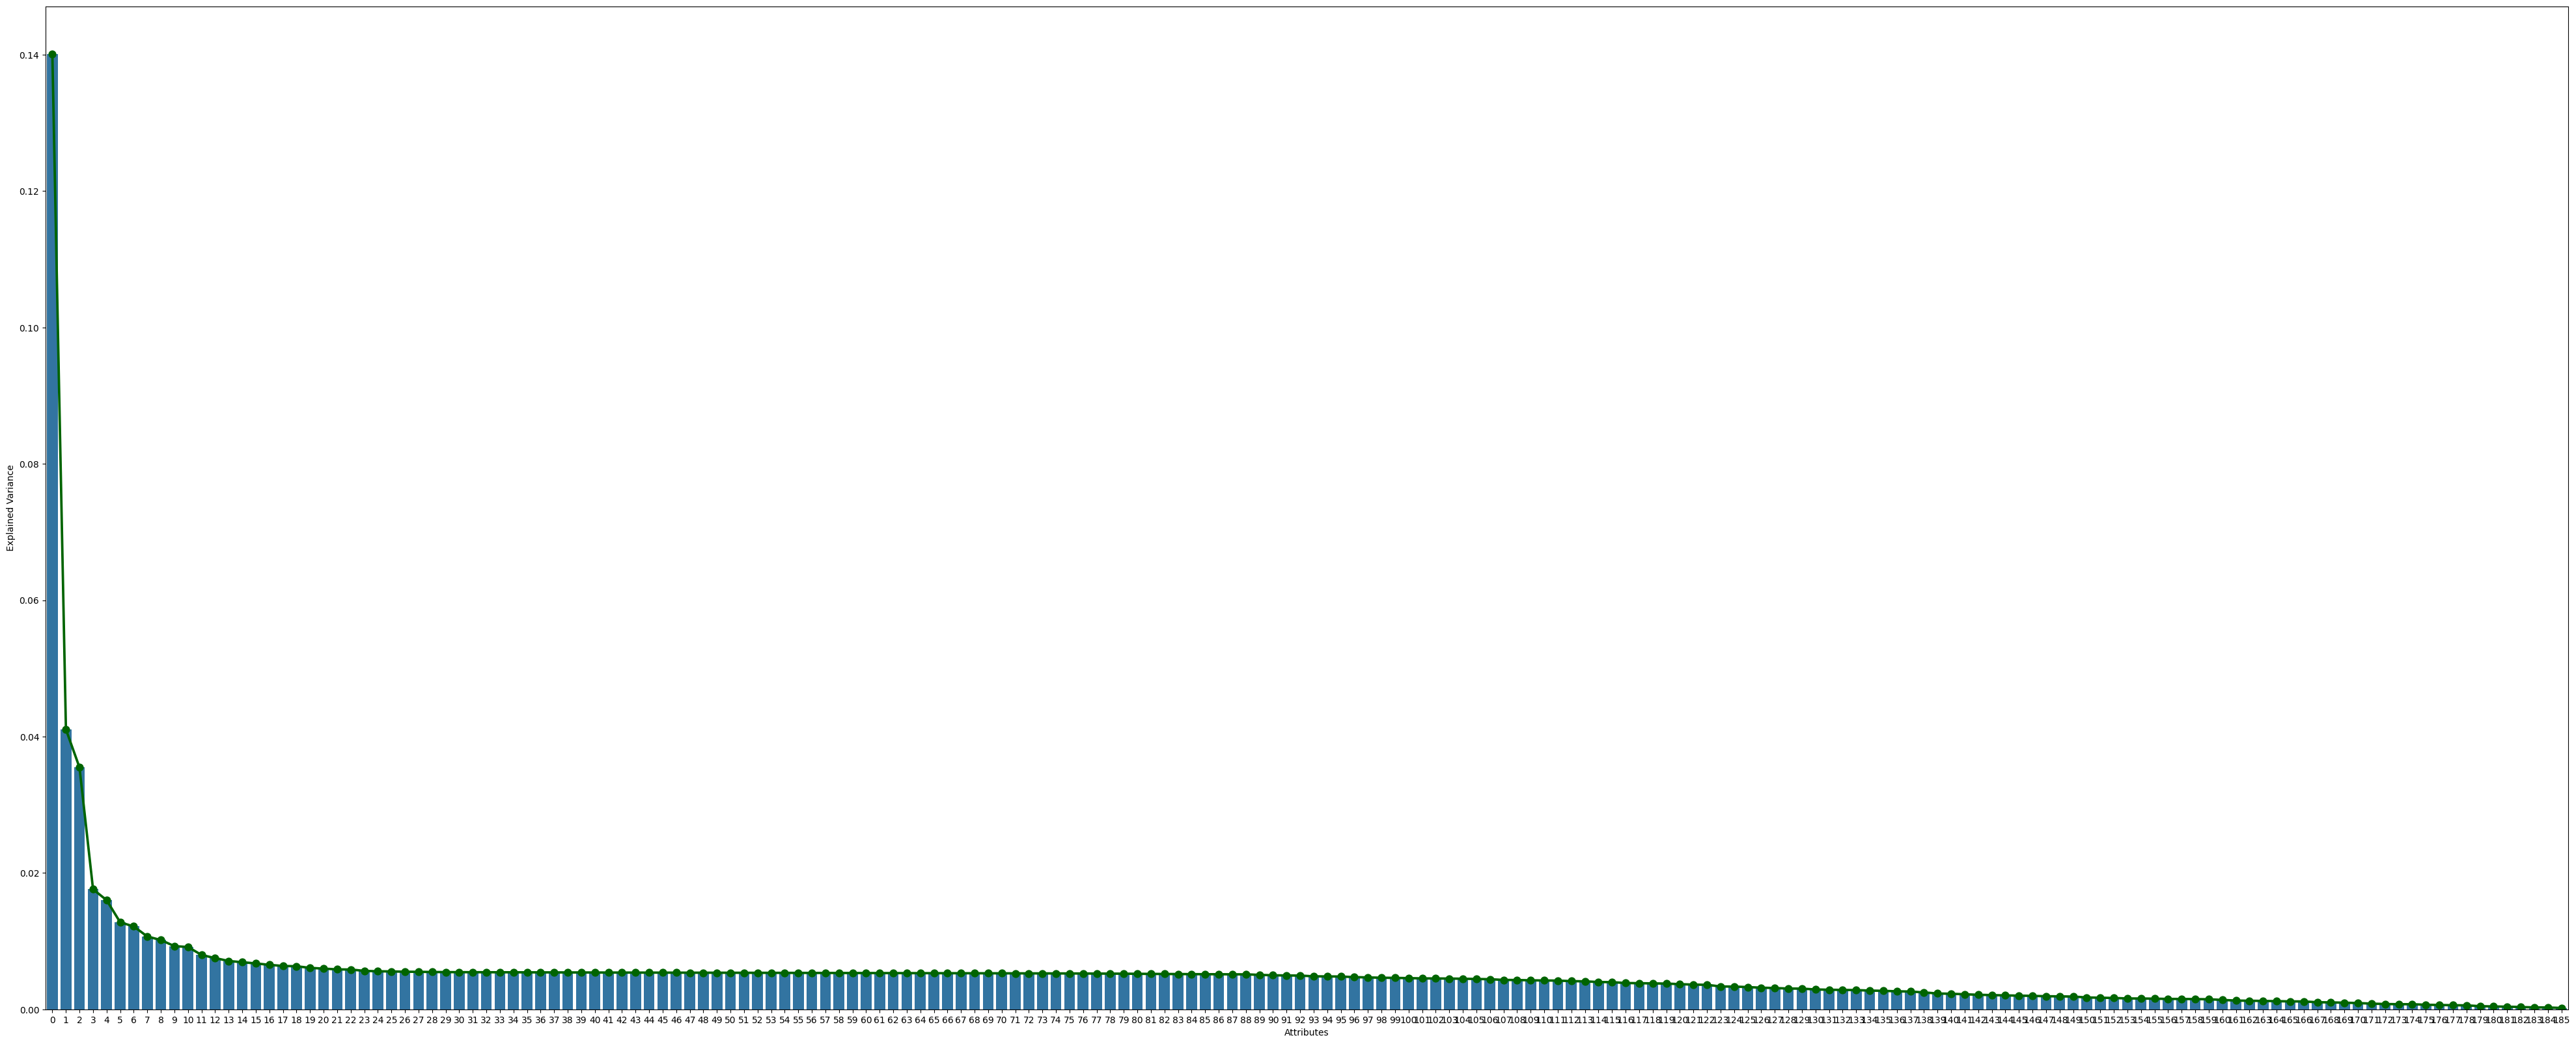

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()
X_train_standart = std_scale.fit_transform(X)

pca = PCA(n_components=186)
pca.fit(X_train_standart)
pca.explained_variance_ratio_

f, axes = plt.subplots(1, 1, figsize=(50, 20))
sns.barplot(pca.explained_variance_ratio_,ax=axes)
plot = sns.pointplot(pca.explained_variance_ratio_,ax=axes, color='darkgreen')
plot.set_xlabel('Attributes')
plot.set_ylabel('Explained Variance')

**HistGB on PCA-preprocessed data**

In [ ]:
# Выделим признаки для обучения и искомый признак в датасете train
# для обучения модели
# X = data_train.drop(['target', 'smpl'], axis=1)  pca_preprocessed instead

pca = PCA(n_components=90)
pca.fit(X_train_standart)
X_train_pca = pca.transform(X_train_standart)
y = data_train['target']

# Разобьем тренировочные данные на валидационный и тренировочный датасет в соотношении 7 к 3
# Cтратифицируем выборки по искомому признаку, зафиксируем random_state для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(X_train_pca, y, random_state=42, stratify=y, test_size=0.3)

# Обучим модель на тренировочной части тренировочных данных
gbdt_clf = HistGradientBoostingClassifier(min_samples_leaf=1,
                                          max_depth=10,
                                          max_iter=125,
                                          random_state=42).fit(X_train, y_train)

# Получим предсказание с вероятностями для валидационной части тренировочного датасета
y_pred_proba = gbdt_clf.predict_proba(X_test)
y_pred = gbdt_clf.predict(X_test)

# Переведем предсказание в формат Series
y_pred_proba = pd.Series(y_pred_proba[:, 1])

# Высчитаем метрику roc-auc по валидационным данным
print(f'Метрика roc-auc на валидационных данных имеет значение: {roc_auc_score(y_test, y_pred_proba)}')
print(f'Метрика recall на валидационных данных имеет значение: {recall_score(y_test, y_pred)}')
print(f'Метрика precision на валидационных данных имеет значение: {precision_score(y_test, y_pred)}') #кажется, что здесь recall важнее, т.к.
print(f'Метрика f1_score на валидационных данных имеет значение: {f1_score(y_test, y_pred)}')
print(f'Метрика accuracy на валидационных данных имеет значение: {accuracy_score(y_test, y_pred)}')

Метрика roc-auc на валидационных данных имеет значение: 0.7826919305497294
Метрика recall на валидационных данных имеет значение: 0.0012301804264625478
Метрика precision на валидационных данных имеет значение: 0.05555555555555555
Метрика f1_score на валидационных данных имеет значение: 0.0024070607114201658
Метрика accuracy на валидационных данных имеет значение: 0.9398188110584952


**Feature selection**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [ ]:
X = data_train.drop(['target', 'smpl'], axis=1)
y = data_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8, test_size = 0.3)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = DecisionTreeClassifier(max_depth =16, random_state = 42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

importances = clf.feature_importances_ # здесь кажется вероятность того, что каждый из 186 признаков значим,
# но длина этого numpy массива = 185

threshold = 0.1
selected_features = X.columns[importances > threshold]
# unique_values, counts = np.unique(importances, return_counts=True)

# Use only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Сам классификатор
gbdt_clf = HistGradientBoostingClassifier(min_samples_leaf=1,
                                          max_depth=20,
                                          max_iter=125,
                                          random_state=42).fit(X_train_selected, y_train)

# Получим предсказание с вероятностями для валидационной части тренировочного датасета
y_pred = gbdt_clf.predict_proba(X_test_selected)

# Переведем предсказание в формат Series
y_pred = pd.Series(y_pred[:, 1])

# Высчитаем метрику roc-auc по валидационным данным
print(f'Метрика roc-auc на валидационных данных имеет значение: {roc_auc_score(y_test, y_pred)}')

KeyboardInterrupt: 

## Этап 3. Предсказание для тестовых данных

Получим предсказание на тестовых данных

In [ ]:
# Обучим модель на полных тренировочных данных
gbdt_clf = HistGradientBoostingClassifier(min_samples_leaf=1,
                                          max_depth=20,
                                          max_iter=125,
                                          random_state=42).fit(X, y)

# Для предсказания используем тестовый датасет с исключенным признаком smpl
y_test_pred = gbdt_clf.predict_proba(data_test.drop(['smpl'], axis=1))

# Переведем предсказание в формат Series
y_test_pred = pd.Series(y_test_pred[:, 1])

# Добавим данные предсказания к датасету
data_test['target'] = y_test_pred

# Сохраним итоговые данные об id и предсказаниях в формате csv
data_test[['id', 'target']].to_csv('baseline_submission_case3.csv', index=False)